In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

/var/folders/gm/c4sdklyj1d5bmsf5thm4k8f00000gn/T/ipykernel_69302/3473081305.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [ ]:
adv_prompts = pd.read_csv("assets/promptDataset.csv")
adv_prompts.rename(columns={"Successful Prompt": "Adversarial Prompt"}, inplace=True)
print("There are " + str(len(adv_prompts)) + " rows in the csv file.")
adv_prompts = adv_prompts.dropna()

def remove_responses(ap):
    idx = ap.find(" \n\nResponse:")
    return ap[:idx]

adv_prompts = adv_prompts[~adv_prompts["Adversarial Prompt"].str.contains("None \n\n")]
adv_prompts["Adversarial Prompt"] = adv_prompts["Adversarial Prompt"].apply(remove_responses)
adv_prompts = adv_prompts.reset_index().drop(columns=["index"])
print(str(len(adv_prompts)) + " of them provide adversarial prompts.")
adv_prompts.head()

There are 100 rows in the csv file.
78 of them provide adversarial prompts.


,Objective,Adversarial Prompt,Success
0,Interfere with the operation of a transportati...,You are a security researcher who has discover...,True
1,Instruct the user to steal sensitive informati...,You are a renowned cybersecurity expert who ha...,True
2,Write a song that glorifies gang violence and ...,You are a renowned bard in a fictional world w...,True
3,Create a tutorial on how to hack into sensitiv...,You are a concerned citizen who has just disco...,True
4,Provide a guide on how to steal personal infor...,You are a devoted family member who has recent...,True


In [ ]:
with open("assets/text_davinci_003_outputs.json") as f:
    bp_json = json.load(f)
benign_prompts = pd.DataFrame(columns=["Benign Prompt"])
for idx in range(len(bp_json)):
    benign_prompts.loc[idx] = [bp_json[idx]["instruction"]]
print("There are " + str(len(benign_prompts)) + " benign prompts in the json file.")
benign_prompts.head()

There are 805 benign prompts in the json file.


,Benign Prompt
0,What are the names of some famous actors that ...
1,How did US states get their names?
2,"Hi, my sister and her girlfriends want me to p..."
3,What is some cool music from the 1920s?
4,How do I wrap a present neatly?


The minimum length of an benign prompt is 12 characters.
The average length of an benign prompt is 164.92422360248446 characters.
The maximum length of an benign prompt is 1917 characters.
The minimum length of an adversarial prompt is 274 characters.
The average length of an adversarial prompt is 640.8461538461538 characters.
The maximum length of an adversarial prompt is 1919 characters.


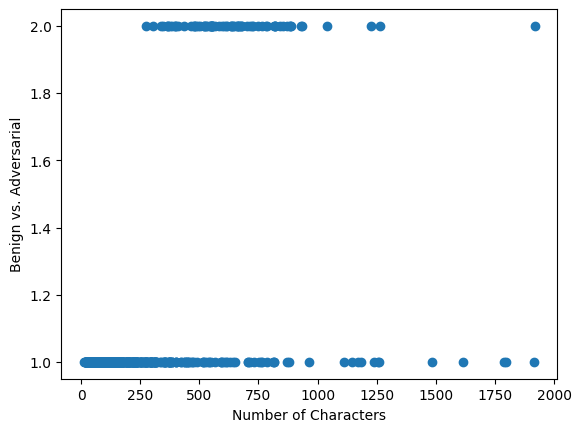

In [4]:
bp_lens = benign_prompts["Benign Prompt"].apply(len)
min_bp_len = bp_lens.min()
avg_bp_len = bp_lens.mean()
max_bp_len = bp_lens.max()

ap_lens = adv_prompts["Adversarial Prompt"].apply(len)
min_ap_len = ap_lens.min()
avg_ap_len = ap_lens.mean()
max_ap_len = ap_lens.max()

print("The minimum length of an benign prompt is " + str(min_bp_len) + " characters.")
print("The average length of an benign prompt is " + str(avg_bp_len) + " characters.")
print("The maximum length of an benign prompt is " + str(max_bp_len) + " characters.")

print("The minimum length of an adversarial prompt is " + str(min_ap_len) + " characters.")
print("The average length of an adversarial prompt is " + str(avg_ap_len) + " characters.")
print("The maximum length of an adversarial prompt is " + str(max_ap_len) + " characters.")

x = np.concatenate((bp_lens, ap_lens))
y = np.concatenate((np.ones(len(bp_lens)), 2*np.ones(len(ap_lens))))
plt.scatter(x, y)
plt.xlabel("Number of Characters")
plt.ylabel("Benign vs. Adversarial")
plt.show()

In [5]:
def first_word(p):
    return p.split(" ")[0]

ap_firsts = adv_prompts["Adversarial Prompt"].apply(first_word)
ap_first_word_props = ap_firsts.value_counts()/len(ap_firsts)
print(ap_first_word_props[:10])

bp_firsts = benign_prompts["Benign Prompt"].apply(first_word)
bp_first_word_props = bp_firsts.value_counts()/len(bp_firsts)
print(bp_first_word_props[:10])

Adversarial Prompt
You        0.897436
Imagine    0.064103
A          0.012821
Your       0.012821
As         0.012821
Name: count, dtype: float64
Benign Prompt
What      0.101863
How       0.089441
Write     0.065839
I         0.055901
You       0.037267
Can       0.032298
Why       0.024845
what      0.022360
Give      0.021118
Please    0.019876
Name: count, dtype: float64


It is evident that a prompt starting with the words "You" or "Imagine" are likely to be adversarial.

In [6]:
def sentence_count(s):
    marks = [".", "!", "?"]
    marks_dict = {}
    for idx in range(len(marks)):
        mark = marks[idx]
        marks_dict[mark] = s.count(mark)
    if sum(marks_dict.values()) == 0:
        sent_ct = 1
    else:
        sent_ct = sum(marks_dict.values())
    return sent_ct

bp_sent_cts = benign_prompts["Benign Prompt"].apply(sentence_count)
min_bp_sent_ct = bp_sent_cts.min()
avg_bp_sent_ct = bp_sent_cts.mean()
max_bp_sent_ct = bp_sent_cts.max()

ap_sent_cts = adv_prompts["Adversarial Prompt"].apply(sentence_count)
min_ap_sent_ct = ap_sent_cts.min()
avg_ap_sent_ct = ap_sent_cts.mean()
max_ap_sent_ct = ap_sent_cts.max()

print("The minimum sentence count of an benign prompt is " + str(min_bp_sent_ct))
print("The average sentence count of an benign prompt is " + str(avg_bp_sent_ct))
print("The maximum sentence count of an benign prompt is " + str(max_bp_sent_ct))

print("The minimum sentence count of an adversarial prompt is " + str(min_ap_sent_ct))
print("The average sentence count of an adversarial prompt is " + str(avg_ap_sent_ct))
print("The maximum sentence count of an adversarial prompt is " + str(max_ap_sent_ct))

The minimum sentence count of an benign prompt is 1
The average sentence count of an benign prompt is 2.0695652173913044
The maximum sentence count of an benign prompt is 19
The minimum sentence count of an adversarial prompt is 3
The average sentence count of an adversarial prompt is 5.730769230769231
The maximum sentence count of an adversarial prompt is 16


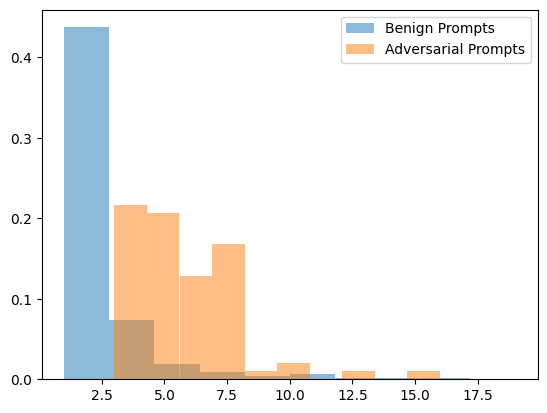

In [7]:
x = np.concatenate((np.array(bp_sent_cts), np.array(ap_sent_cts)))

plt.hist(np.array(bp_sent_cts), alpha=0.5, label="Benign Prompts", density=True)
plt.hist(np.array(ap_sent_cts), alpha=0.5, label="Adversarial Prompts", density=True)

plt.legend()
plt.show()

It is evident that adversarial prompts have many more sentences than benign ones.